<a href="https://colab.research.google.com/github/stuartIane/MachineLearning/blob/main/Logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ISLP

In [2]:
from ISLP import load_data

import pandas as pd
import numpy as np

In [3]:
default = load_data("Default")

In [4]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
default['default1'] = (default['default'] == "Yes").astype(int)

In [15]:
print(default['default1'].value_counts())

0    9667
1     333
Name: default1, dtype: int64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='balance', ylabel='income'>

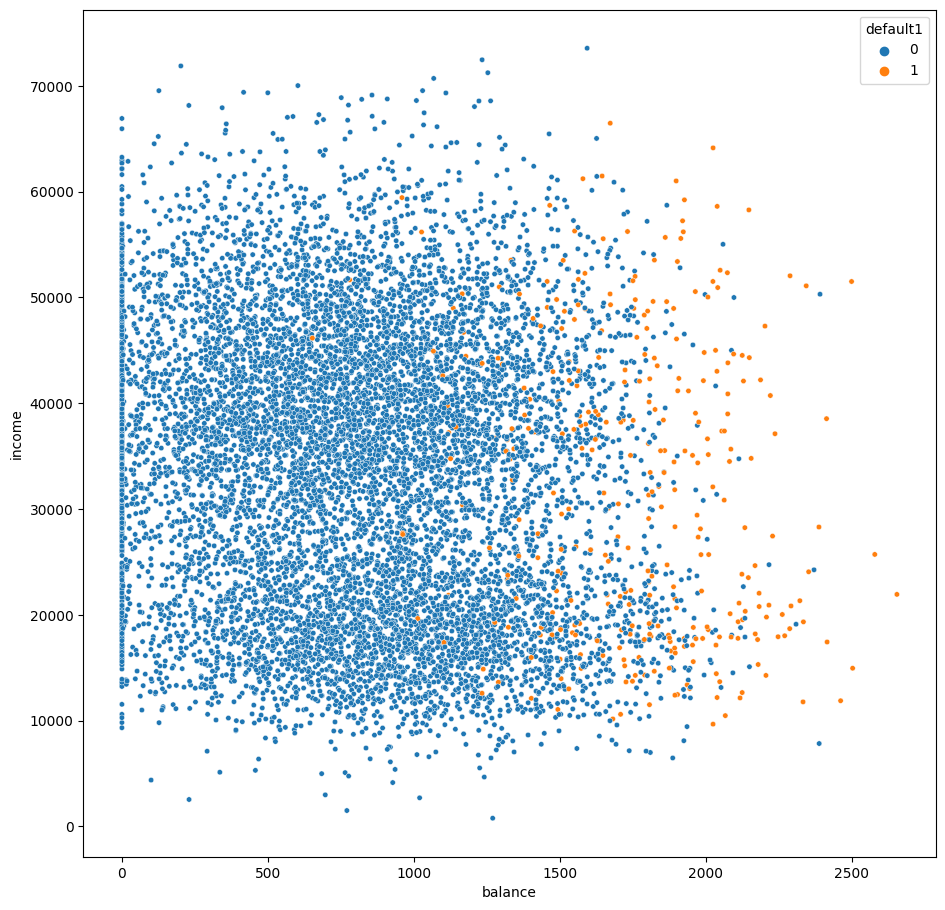

In [29]:
# Scatter plot of income and balance, hued by default

plt.figure(figsize = (11,11))
sns.scatterplot(data = default, x = 'balance', y = 'income', hue = 'default1', s = 15)

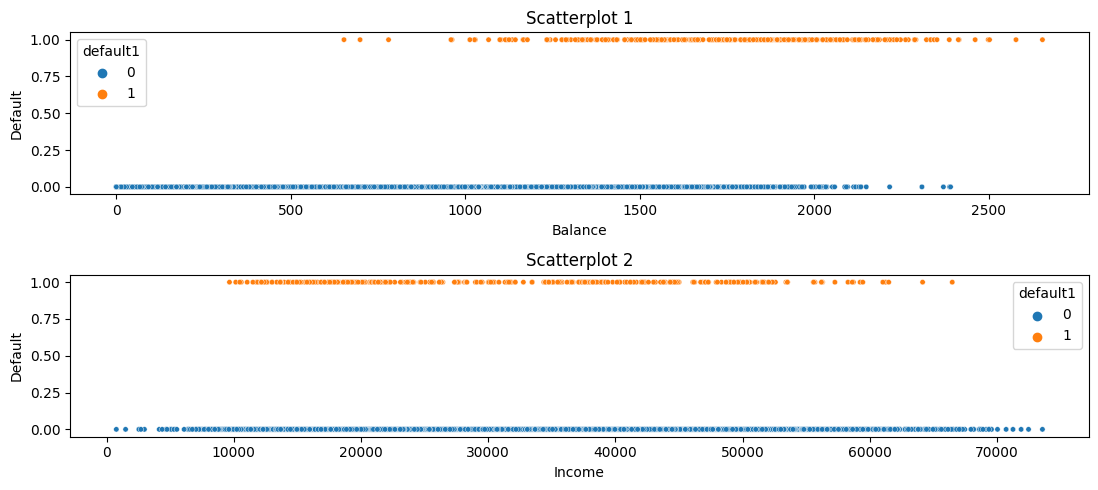

In [34]:
# Subplots of income and balance on default

fig, axes = plt.subplots(2, 1, figsize = (11, 5))

sns.scatterplot(data = default, x = 'balance', y = 'default1', hue = 'default1', s = 15, ax = axes[0])
axes[0].set_title('Scatterplot 1')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Default')

sns.scatterplot(data = default, x = 'income', y = 'default1', hue = 'default1', s = 15, ax = axes[1])
axes[1].set_title('Scatterplot 2')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Default')

plt.tight_layout()
plt.show()


**MAXIMUM** **LIKELIHOOD**

**Logistic regression**

Given predictors $x_i$, the posterior probability for class 1 is modelled using the logistic function:

$$
P_{\beta}\{y_i = 1|x_i\} = \frac{e^{x_i'\beta}}{1+e^{x_i'\beta}} =  \frac{1}{1+e^{-x_i'\beta}}.
$$

For a given observation $i$, if $y_i = 1$, then the contribution to the likelihood is $P_{\beta}\{y_i = 1|x_i\}$. If $y_i = 0$, then the contribution to the likelihood is $1 - P_{\beta}\{y_i = 1|x_i\}$.

This can be represented compactly as:

$$
L_i(\beta) = P_{\beta}\{y_i = 1|x_i\}^{y_i}(1-P_{\beta}\{y_i = 1|x_i\})^{1-y_i}.
$$



**Likelihood function**

In [106]:
from sklearn.model_selection import train_test_split

x = default['balance'].values.reshape(-1, 1)  # Include a column of ones for the intercept
x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)  # Add a column of ones for the intercept
y = default['default1'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 123)

In [107]:
import numpy as np

# Define the logistic function
def logistic(x, beta):
    # Compute the dot product of x and beta
    x_beta = np.dot(x, beta)

    # Clip the input to the logistic function to prevent overflow
    x_beta = np.clip(x_beta, -500, 500)  # Adjust the clip range if needed

    # Compute and return the logistic function
    return 1 / (1 + np.exp(-x_beta))

# Define the log-likelihood function
def log_likelihood(beta, x, y):
    # Calculate the predicted probabilities using the logistic function
    p = logistic(x, beta)

    # Avoid log(0) and log(1) by clipping probabilities
    epsilon = 1e-10
    p = np.clip(p, epsilon, 1 - epsilon)

    # Compute the log-likelihood
    ll = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

    return -ll  # Return the negative log-likelihood

# Example data (replace with your data)
beta_initial = np.array([0, 0])

# Minimize the negative log-likelihood to estimate parameters
from scipy.optimize import minimize
result = minimize(log_likelihood, beta_initial, args=(x_train, y_train), method='BFGS')

# Extract the estimated parameters
estimated_beta = [f'{param:.7f}' for param in result.x]
formatted_parameters = ', '.join(estimated_beta)

print(f"Estimated Parameters: [{formatted_parameters}]")
print("Negative Log-Likelihood:", result.fun)

Estimated Parameters: [-10.4860504, 0.0054521]
Negative Log-Likelihood: 419.47996842341536


In [121]:
yhat = logistic(x_train, result.x)
df = {'balance': x_train[:,1], 'default': y_train, 'est_probs': yhat}

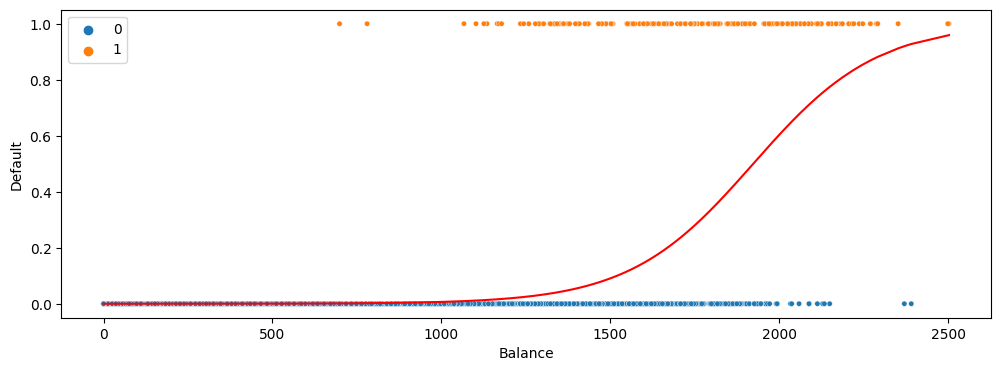

In [130]:
plt.figure(figsize = (12, 4))
sns.scatterplot(data = df, x = 'balance', y = 'default', s = 15, hue = 'default')
sns.lineplot(data = df, x = 'balance', y = yhat, color = 'red')

# Add labels and legend
plt.xlabel('Balance')
plt.ylabel('Default')
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [136]:
x = default[['balance', 'income']].values  # Include a column of ones for the intercept
x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)  # Add a column of ones for the intercept
y = default['default1'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 123)

In [139]:
x_train.shape

(5000, 3)

In [140]:
# Example data (replace with your data)
beta_initial = np.array([0, 0, 0])

# Minimize the negative log-likelihood to estimate parameters
from scipy.optimize import minimize
result = minimize(log_likelihood, beta_initial, args=(x_train, y_train), method='BFGS')

# Extract the estimated parameters
estimated_beta = [f'{param:.7f}' for param in result.x]
formatted_parameters = ', '.join(estimated_beta)

print(f"Estimated Parameters: [{formatted_parameters}]")
print("Negative Log-Likelihood:", result.fun)

Estimated Parameters: [-11.1711917, 0.0055521, 0.0000168]
Negative Log-Likelihood: 416.34389207458634


In [154]:
bhat = [float(bk) for bk in estimated_beta]

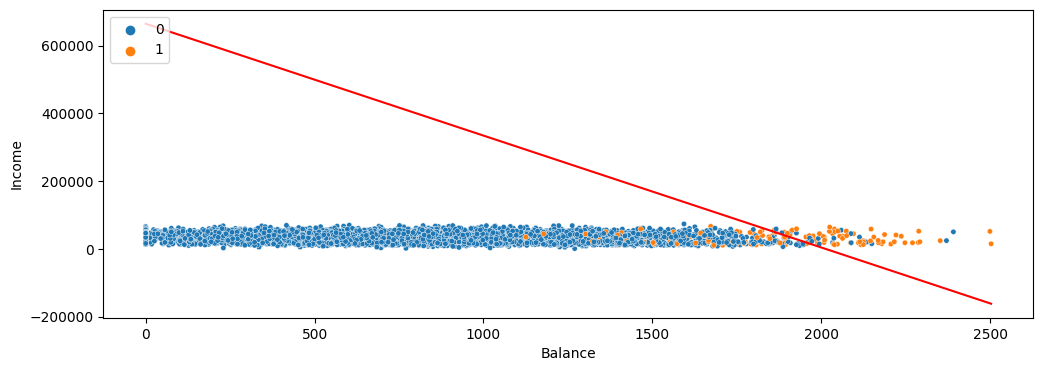

In [172]:
# Bayes decision boundary (BDB)
slope = -bhat[1]/bhat[2]
intercept = -bhat[0]/bhat[2]
bdb = [slope * xi + intercept for xi in x_train[:,1]]
df2 = {'balance': x_train[:,1], 'income': x_train[:,2], 'default': y_train, 'est_probs': yhat, 'bdb': bdb}
df2 = pd.DataFrame(df2)

plt.figure(figsize = (12, 4))
sns.scatterplot(data = df2, x = 'balance', y = 'income', s = 15, hue = 'default')
sns.lineplot(data = df2, x = 'balance', y = 'bdb', color = 'red')

# Add labels and legend
plt.xlabel('Balance')
plt.ylabel('Income')
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [176]:
df2['bdb'].describe()

count      5000.000000
mean     389692.273144
std      160573.335993
min     -162140.792071
25%      279364.909168
50%      394112.833398
75%      508179.895452
max      664951.886905
Name: bdb, dtype: float64

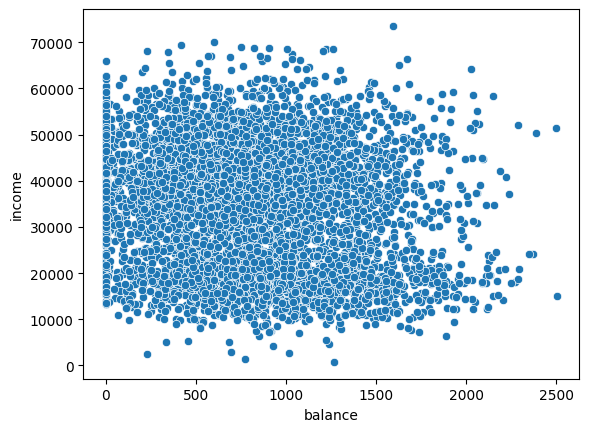

In [182]:
sns.scatterplot(data = df2, x = 'balance', y = 'income')
plt.show()